In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import copy
import math
import seaborn as sns
from copy import deepcopy

# 1 O_T Approx & Real

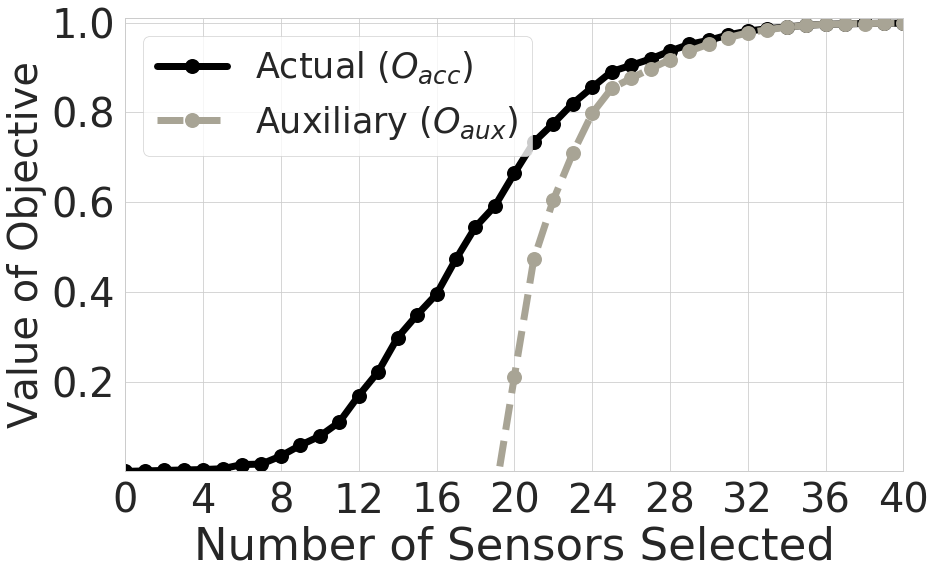

In [16]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
sns.set_palette(sns.xkcd_palette(['black', 'greyish']))

SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_ot_approx_real = pd.read_csv('plot_data64/Offline_Greedy.csv', header=None)

X_approx, Y_approx = df_ot_approx_real[0].tolist(), df_ot_approx_real[1].tolist()
X_real, Y_real = df_ot_approx_real[0].tolist(), df_ot_approx_real[2].tolist()

X_real.insert(0, 0)
Y_real.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_real, Y_real, linestyle='-', marker='o', markersize=15)
plt.plot(X_approx, Y_approx, linestyle='--', marker='o', markersize=15)

plt.legend(['Actual ($O_{acc})$', 'Auxiliary ($O_{aux}$)'], prop={'size':35})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Value of Objective', fontsize=40)
x_axis = np.arange(0, 41, 4)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 40])
plt.ylim([0, 1.01])

plt.savefig('plot64/ot_real_approx.png')
plt.show()

# 2.1 Offline Homo

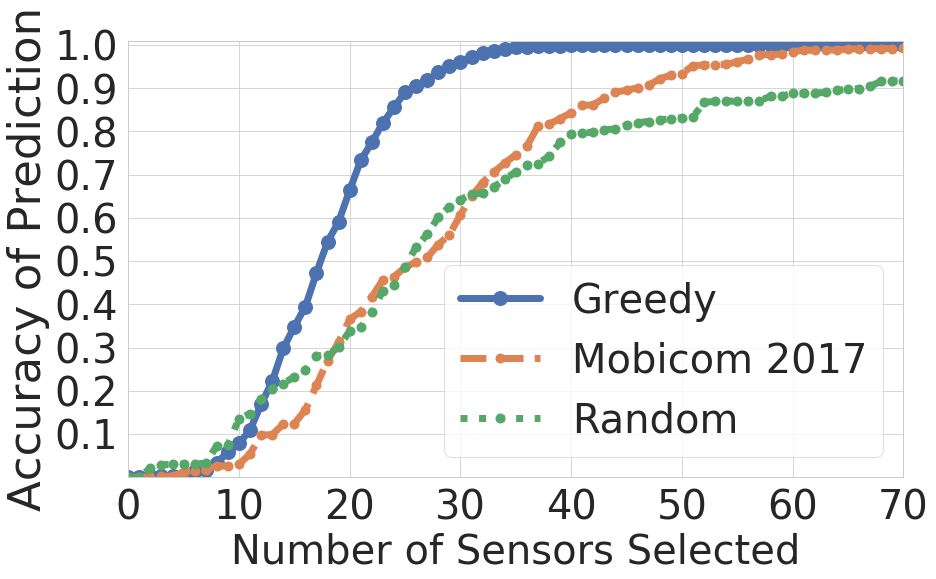

In [19]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data64/Offline_Greedy.csv', header=None)
df_coverage = pd.read_csv('plot_data64/Offline_Coverage.csv', header=None)
df_random = pd.read_csv('plot_data64/Offline_Random.csv', header=None)


X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[2].tolist()
X_coverage, Y_coverage = df_coverage[0].tolist(), df_coverage[1].tolist()
X_random, Y_random = df_random[0].tolist(), df_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_coverage.insert(0, 0)
Y_coverage.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

while (len(X_greedy) <= 70):
    X_greedy.insert(len(X_greedy), len(X_greedy))
    Y_greedy.insert(len(X_greedy), 1)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy, linestyle='-', marker='o', markersize=15)
plt.plot(X_coverage, Y_coverage, linestyle='--', marker='o', markersize=10)
plt.plot(X_random, Y_random, linestyle=':', marker='o', markersize=10)
plt.legend(['Greedy', 'Mobicom 2017', 'Random'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=45)
x_axis = np.arange(0, 71, 10)
plt.xticks(x_axis)
y_axis = np.arange(0.1, 1.1, 0.1)
plt.yticks(y_axis)
plt.xlim([0, 70])
plt.ylim([0, 1.01])

plt.savefig('plot64/offline_homo.png')
plt.show()

# 2.2 Offline Homo with o_t_approx_distance

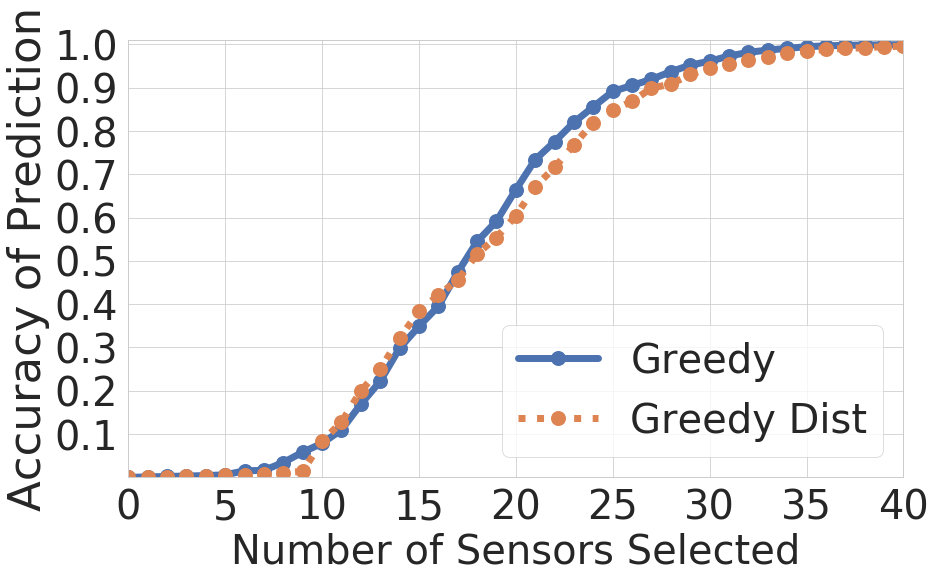

In [5]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data64/Offline_Greedy.csv', header=None)
df_greedy_dist = pd.read_csv('plot_data64/Offline_Greedy_dist.csv', header=None)

X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[2].tolist()
X_greedy_dist, Y_greedy_dist = df_greedy_dist[0].tolist(), df_greedy_dist[2].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_greedy_dist.insert(0, 0)
Y_greedy_dist.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy, marker='o', linestyle='-', markersize=15)
plt.plot(X_greedy_dist, Y_greedy_dist, linestyle=':', marker='o', markersize=15)
plt.legend(['Greedy', 'Greedy Dist'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=45)
x_axis = np.arange(0, 41, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.1, 1.1, 0.1)
plt.yticks(y_axis)
plt.xlim([0, 40])
plt.ylim([0, 1.01])

plt.savefig('plot64/offline_homo_dist.pdf')
plt.show()

# 3 Offline Hetero

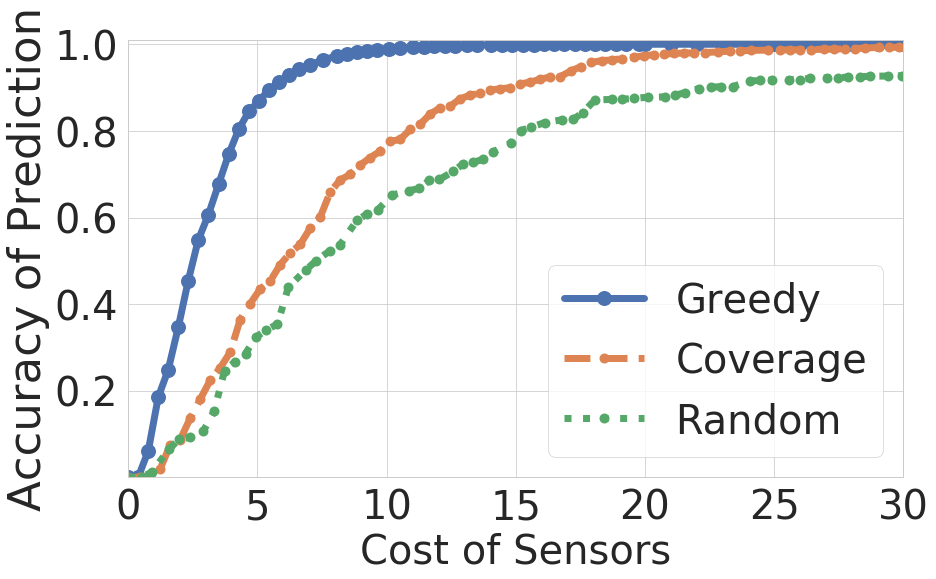

In [6]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_greedy = pd.read_csv('plot_data64/Offline_Greedy_hetero.csv', header=None)
df_coverage = pd.read_csv('plot_data64/Offline_Coverage_hetero.csv', header=None)
df_random = pd.read_csv('plot_data64/Offline_Random_hetero.csv', header=None)


X_greedy, Y_greedy = df_greedy[0].tolist(), df_greedy[1].tolist()
X_coverage, Y_coverage = df_coverage[0].tolist(), df_coverage[1].tolist()
X_random, Y_random = df_random[0].tolist(), df_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_coverage.insert(0, 0)
Y_coverage.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

i = 20
while (i <= 30):
    X_greedy.insert(len(X_greedy), i)
    Y_greedy.insert(len(Y_greedy), 1)
    i += 1
    
rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy, linestyle='-', marker='o', markersize=15)
plt.plot(X_coverage, Y_coverage, linestyle='--', marker='o', markersize=10)
plt.plot(X_random, Y_random, linestyle=':', marker='o', markersize=10)
plt.legend(['Greedy', 'Coverage', 'Random'], prop={'size':40})
plt.xlabel('Cost of Sensors', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=45)
x_axis = np.arange(0, 31, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 30])
plt.ylim([0, 1.01])

plt.savefig('plot64/offline_hetero.pdf')
plt.show()

# 4 Online Homo

In [8]:
def add_x_axis(df):
    df.rename(columns={0:1}, inplace=True)
    x_axis = [i for i in range(1, len(df)+1)]
    df.insert(0, 0, x_axis)

In [9]:
# average for greedy (online homo)
filename = 'plot_data64/online_greedy_homo/acc_CAITAO.csv'
df_temp = pd.read_csv(filename.replace('CAITAO', str(0)), header=None)
concat = np.array([df_temp[1]])

for i in range(1, 20):
    df_temp = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)

average_greedy = pd.DataFrame(concat.mean(axis=0))
add_x_axis(average_greedy)
average_greedy

,0,1
0,1,0.02660
1,2,0.14510
2,3,0.32220
3,4,0.45415
4,5,0.54330
5,6,0.56190
6,7,0.68050
7,8,0.78045
8,9,0.81650
9,10,0.92870


In [10]:
# average for nearest (online homo)
filename = 'plot_data64/online_nearest_homo/acc_CAITAO.csv'
df_temp = pd.read_csv(filename.replace('CAITAO', str(0)), header=None)
concat = np.array([df_temp[1]])

for i in range(1, 20):
    df_temp = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)

average_nearest = pd.DataFrame(concat.mean(axis=0))
add_x_axis(average_nearest)
average_nearest

,0,1
0,1,0.00035
1,2,0.01810
2,3,0.08840
3,4,0.16320
4,5,0.22860
5,6,0.27495
6,7,0.36740
7,8,0.39610
8,9,0.47520
9,10,0.54915


In [11]:
# average for random (online homo)
filename = 'plot_data64/online_random_homo/acc_CAITAO.csv'
df_temp = pd.read_csv(filename.replace('CAITAO', str(0)), header=None)
concat = np.array([df_temp[1]])

for i in range(1, 20):
    df_temp = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    ar_temp = np.array([df_temp[1]])
    concat = np.concatenate((concat, ar_temp), axis=0)

average_random = pd.DataFrame(concat.mean(axis=0))
add_x_axis(average_random)
average_random

,0,1
0,1,0.00015
1,2,0.00015
2,3,0.00000
3,4,0.00300
4,5,0.00360
5,6,0.05390
6,7,0.05440
7,8,0.10355
8,9,0.13070
9,10,0.14075


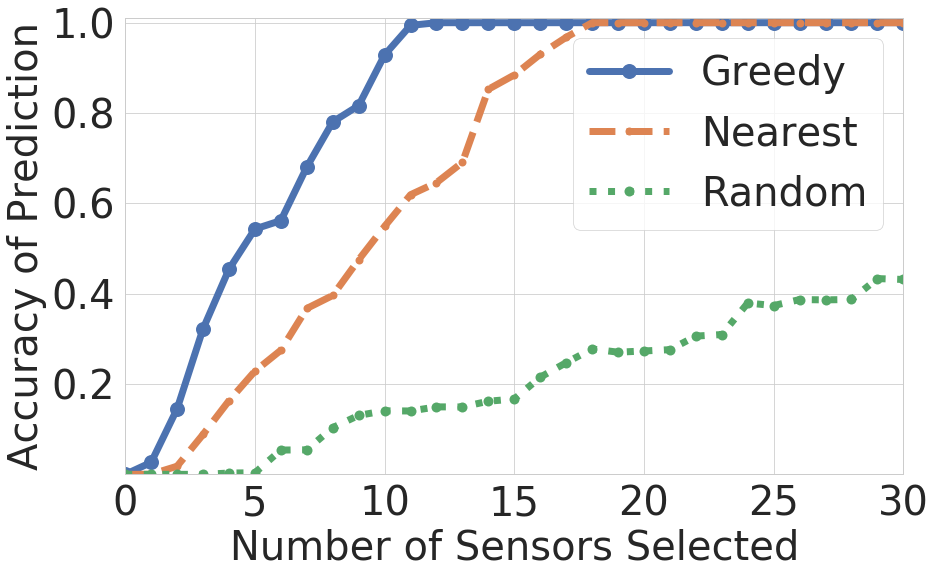

In [13]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title


X_greedy, Y_greedy = average_greedy[0].tolist(), average_greedy[1].tolist()
X_nearest, Y_nearest = average_nearest[0].tolist(), average_nearest[1].tolist()
X_random, Y_random = average_random[0].tolist(), average_random[1].tolist()

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_nearest.insert(0, 0)
Y_nearest.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

i = len(X_greedy)
while (i <= 70):
    X_greedy.insert(len(X_greedy), i)
    Y_greedy.insert(len(Y_greedy), 1)
    i += 1

i = len(X_nearest)
while (i <= 70):
    X_nearest.insert(len(X_nearest), i)
    Y_nearest.insert(len(Y_nearest), 1)
    i += 1
    
rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy, linestyle='-', marker='o', markersize=15)
plt.plot(X_nearest, Y_nearest, linestyle='--', marker='o', markersize=8)
plt.plot(X_random, Y_random, linestyle=':', marker='o', markersize=10)
plt.legend(['Greedy', 'Nearest', 'Random'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=40)
x_axis = np.arange(0, 71, 5)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 30])
plt.ylim([0, 1.01])

plt.savefig('plot64/online_homo.pdf')
plt.show()

# 5 Online Hetero

In [14]:
# greedy for online hetero
budget, step = 8, 0.3
plot = []
bin_index = int(budget//step)   # bin_index = 26
bin_num = bin_index + 1
for i in range(bin_num):
    plot.append([])

filename = 'plot_data64/online_greedy_hetero/acc_CAITAO.csv'
for i in range(20):
    df = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    index = 0
    for j in range(len(df)):
        bin_ = int(df.iloc[j, 0]//step)
        while index < bin_:
            plot[index].append(df.iloc[j, 1])
            index += 1
        plot[bin_].append(df.iloc[j, 1])
        index += 1
    if index < bin_num:
        plot[index].append(df.iloc[len(df)-1, 1])
        index += 1
        
average_greedy = []
for i in range(len(plot)):
    #print(i, np.array(plot[i]).mean())
    average_greedy.append(np.array(plot[i]).mean())

In [15]:
# nearest for online hetero
budget, step = 10, 0.3
plot = []
bin_index = int(budget//step)   # bin_index = 26
bin_num = bin_index + 1
for i in range(bin_num):
    plot.append([])

filename = 'plot_data64/online_nearest_hetero/acc_CAITAO.csv'
for i in range(20):
    df = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    index = 0
    for j in range(len(df)):
        bin_ = int(df.iloc[j, 0]//step)
        while index < bin_:
            plot[index].append(df.iloc[j, 1])
            index += 1
        plot[bin_].append(df.iloc[j, 1])
        index += 1
    if index < bin_num:
        plot[index].append(df.iloc[len(df)-1, 1])
        index += 1
        
average_nearest = []
for i in range(len(plot)):
    #print(i, np.array(plot[i]).mean())
    average_nearest.append(np.array(plot[i]).mean())

In [16]:
# random for online hetero
budget, step = 35, 0.3
plot = []
bin_index = int(budget//step)   # bin_index = 26
bin_num = bin_index + 1
for i in range(bin_num):
    plot.append([])

filename = 'plot_data64/online_random_hetero/acc_CAITAO.csv'
for i in range(20):
    df = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    index = 0
    for j in range(len(df)):
        bin_ = int(df.iloc[j, 0]//step)
        while index < bin_:
            plot[index].append(df.iloc[j, 1])
            index += 1
        plot[bin_].append(df.iloc[j, 1])
        index += 1
    if index < bin_num:
        plot[index].append(df.iloc[len(df)-1, 1])
        index += 1
        
average_random = []
for i in range(len(plot)):
    #print(i, np.array(plot[i]).mean())
    average_random.append(np.array(plot[i]).mean())

In [17]:
def create_x_axis(num, step):
    x_axis = []
    for i in range(num):
        x_axis.append(step*(i+1))
    return x_axis

In [18]:
x_greedy = create_x_axis(len(average_greedy), 0.3)
x_nearest = create_x_axis(len(average_nearest), 0.3)
x_random = create_x_axis(len(average_random), 0.3)
print('Greedy')
for x, y in zip(x_greedy, average_greedy):
    print(str(round(x, 2)).ljust(4), y)
print('\nNearest')
for x, y in zip(x_nearest, average_nearest):
    print(str(round(x, 2)).ljust(4), y)
print('\nRandom')
for x, y in zip(x_random, average_random):
    print(str(round(x, 2)).ljust(4), y)

Greedy
0.3  0.0034500000000000004
0.6  0.0034500000000000004
0.9  0.0361
1.2  0.10789999999999997
1.5  0.23790000000000006
1.8  0.23790000000000006
2.1  0.35600000000000004
2.4  0.4588500000000001
2.7  0.5721999999999999
3.0  0.5721999999999999
3.3  0.67265
3.6  0.8002499999999999
3.9  0.9214499999999999
4.2  0.9318
4.5  0.98925
4.8  0.99925
5.1  0.9998000000000001
5.4  0.99985
5.7  0.99975
6.0  0.9999500000000001
6.3  1.0
6.6  0.9999500000000001
6.9  1.0
7.2  1.0
7.5  1.0
7.8  1.0
8.1  1.0

Nearest
0.3  0.0006000000000000001
0.6  0.0006000000000000001
0.9  0.0027
1.2  0.041100000000000005
1.5  0.09770000000000001
1.8  0.09770000000000001
2.1  0.1624
2.4  0.25209999999999994
2.7  0.37355000000000005
3.0  0.37355000000000005
3.3  0.55815
3.6  0.69825
3.9  0.7350000000000001
4.2  0.76455
4.5  0.77385
4.8  0.8039999999999999
5.1  0.8103
5.4  0.8195499999999999
5.7  0.9018499999999999
6.0  0.9237500000000001
6.3  0.9737
6.6  0.99975
6.9  0.99975
7.2  0.9996500000000001
7.5  1.0
7.8  1.0
8.

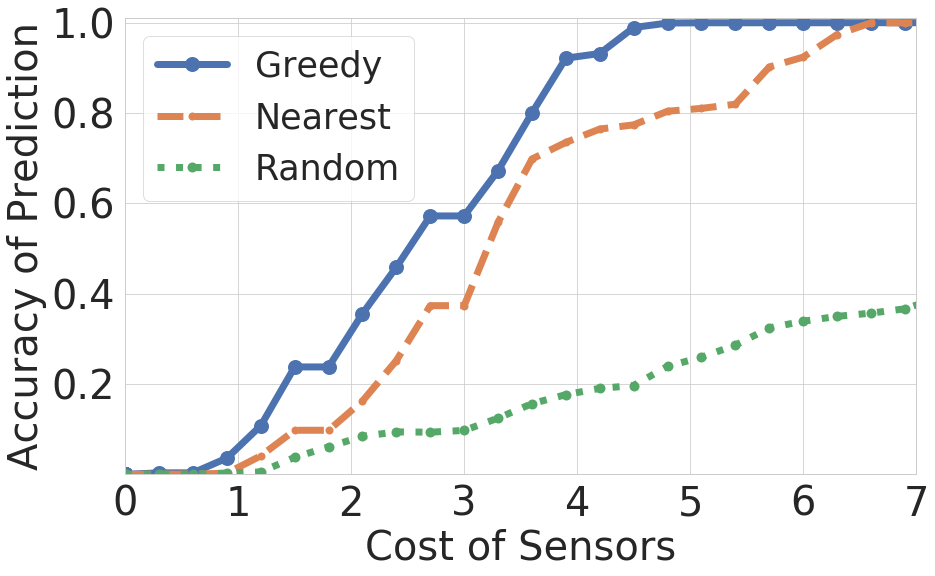

In [34]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title


X_greedy, Y_greedy = x_greedy, average_greedy
X_nearest, Y_nearest = x_nearest, average_nearest
X_random, Y_random = x_random, average_random

X_greedy.insert(0, 0)
Y_greedy.insert(0, 0)
X_nearest.insert(0, 0)
Y_nearest.insert(0, 0)
X_random.insert(0, 0)
Y_random.insert(0, 0)

i = 8
while (i <= 21):
    X_greedy.insert(len(X_greedy), i)
    Y_greedy.insert(len(Y_greedy), 1)
    i += 1

i = 11
while (i <= 21):
    X_nearest.insert(len(X_nearest), i)
    Y_nearest.insert(len(Y_nearest), 1)
    i += 1
    
rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_greedy, Y_greedy, linestyle='-', marker='o', markersize=15)
plt.plot(X_nearest, Y_nearest, linestyle='--', marker='o', markersize=8)
plt.plot(X_random, Y_random, linestyle=':', marker='o', markersize=10)
plt.legend(['Greedy', 'Nearest', 'Random'], prop={'size':35})
plt.xlabel('Cost of Sensors', fontsize=40)
plt.ylabel('Accuracy of Prediction', fontsize=40)
x_axis = np.arange(0, 9)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 7])
plt.ylim([0, 1.01])

plt.savefig('plot64/online_hetero.pdf')
plt.show()

# 6 Online Accuracy & Mutual Infomation

In [42]:
# average for mutual information (online homo)
filename = 'plot_data64/online_greedy_homo/mi_CAITAO.csv'
df_temp = pd.read_csv(filename.replace('CAITAO', str(0)), header=None)
concat = np.array([df_temp[0]])

for i in range(1, 20):
    df_temp = pd.read_csv(filename.replace('CAITAO', str(i)), header=None)
    ar_temp = np.array([df_temp[0]])
    concat = np.concatenate((concat, ar_temp), axis=0)

mi_gain = concat.mean(axis=0)

In [43]:
# normalization
mi_gain = mi_gain/mi_gain.sum()
mi_sum = copy.deepcopy(mi_gain)
size = len(mi_sum)
for i in range(1, size):
    mi_sum[i] += mi_sum[i-1]
mi_sum

array([0.10189437, 0.23518365, 0.37931602, 0.50874034, 0.60250409,
       0.68423463, 0.78795013, 0.86746576, 0.90909115, 0.97619128,
       0.99516366, 1.        ])

In [45]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

X_mi = [i for i in range(1, size+1)]
Y_mi = list(mi_sum)
print(average_greedy)
X_accuracy, Y_accuracy = average_greedy[0].tolist(), average_greedy[1].tolist()
X_mi.insert(0, 0)
Y_mi.insert(0, 0)
X_accuracy.insert(0, 0)
Y_accuracy.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_mi, Y_mi, linestyle='-', marker='o', markersize=15)
plt.plot(X_accuracy, Y_accuracy, linestyle='--', marker='o', markersize=15)

plt.legend(['Mutual Information', 'Accuracy'], prop={'size':40})
plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Metric Value', fontsize=40)
x_axis = np.arange(0, 13, 1)
plt.xticks(x_axis)
y_axis = np.arange(0.2, 1.1, 0.2)
plt.yticks(y_axis)
plt.xlim([0, 12])
plt.ylim([0, 1.01])

plt.savefig('plot64/mi_accuracy.pdf')
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0034500000000000004, 0.0034500000000000004, 0.0361, 0.10789999999999997, 0.23790000000000006, 0.23790000000000006, 0.35600000000000004, 0.4588500000000001, 0.5721999999999999, 0.5721999999999999, 0.67265, 0.8002499999999999, 0.9214499999999999, 0.9318, 0.98925, 0.99925, 0.9998000000000001, 0.99985, 0.99975, 0.9999500000000001, 1.0, 0.9999500000000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

AttributeError: 'int' object has no attribute 'tolist'

## 6.1 Correlation(mutual information, accuracy)

In [38]:
len(mi_sum)
mi_sum = list(mi_sum)

In [39]:
len(Y_accuracy)

NameError: name 'Y_accuracy' is not defined

In [431]:
corr = []
corr.append(mi_sum)
corr.append(Y_accuracy)

In [438]:
np.array(corr).T

array([[ 0.10189437,  0.0266    ],
       [ 0.23518365,  0.1451    ],
       [ 0.37931602,  0.3222    ],
       [ 0.50874034,  0.45415   ],
       [ 0.60250409,  0.5433    ],
       [ 0.68423463,  0.5619    ],
       [ 0.78795013,  0.6805    ],
       [ 0.86746576,  0.78045   ],
       [ 0.90909115,  0.8165    ],
       [ 0.97619128,  0.9287    ],
       [ 0.99516366,  0.99405   ],
       [ 1.        ,  1.        ]])

In [439]:
df = pd.DataFrame(np.array(corr).T)

In [442]:
df.corr()

,0,1
0,1.000000,0.993846
1,0.993846,1.000000


# 7 Location of Selected Sensors

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


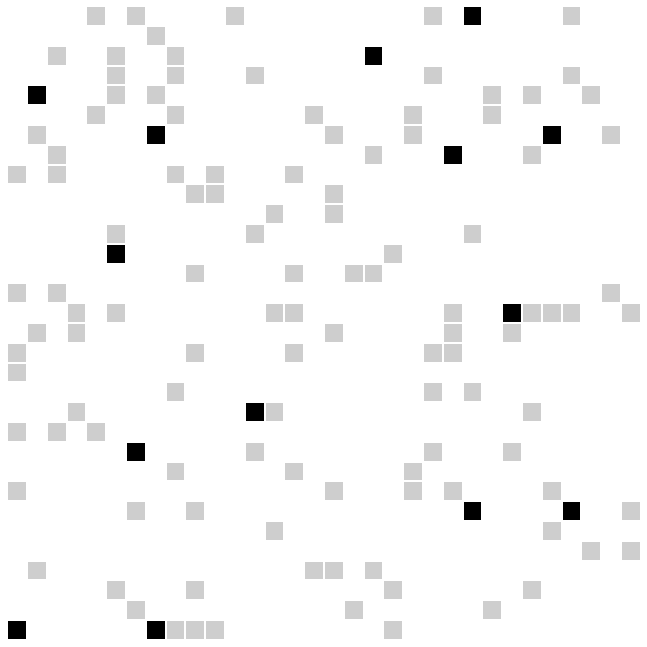

In [215]:
selected = []
with open('plot_data32/Sensor_Location_Offline', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('(', '')
        line = line.replace(')', '')
        line = line.replace(' ', '')
        line = line.rstrip()
        line = line.split(',')
        selected.append((int(line[0]), int(line[1])))
        
sensors = []
with open('data32/homogeneous/sensors', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y = int(line[0]), int(line[1])
        sensors.append((x, y))

gridlen = 32
grid = np.zeros((gridlen, gridlen))

for x in range(gridlen):
    for y in range(gridlen):
        grid[x, y] = -1

for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = -0.4

for select in selected:
    x, y = select[0], select[1]
    grid[x][y] = 1
    
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap='Greys', vmax=1, center=0, xticklabels=False, yticklabels=False,
            square=True, linewidth=1, cbar=False)

plt.savefig('plot32/selected_sensors_offline.png')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


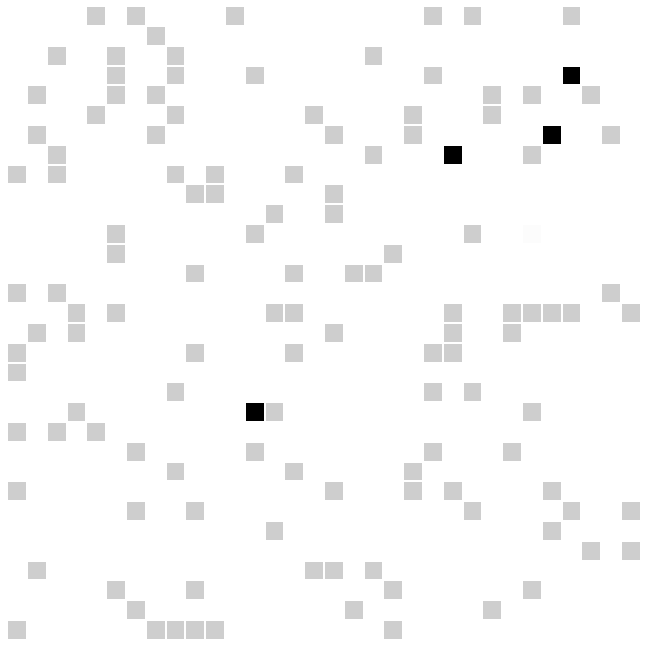

In [444]:
selected = []
with open('plot_data32/Sensor_Location_Online', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('(', '')
        line = line.replace(')', '')
        line = line.replace(' ', '')
        line = line.rstrip()
        line = line.split(',')
        selected.append((int(line[0]), int(line[1])))
        
sensors = []
with open('data32/homogeneous/sensors', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split(' ')
        x, y = int(line[0]), int(line[1])
        sensors.append((x, y))

gridlen = 32
grid = np.zeros((gridlen, gridlen))

for x in range(gridlen):
    for y in range(gridlen):
        grid[x, y] = -1

true = (11, 26)    # true transmitter
grid[true[0]][true[1]] = -0.95

for sensor in sensors:
    x, y = sensor[0], sensor[1]
    grid[x][y] = -0.4

for select in selected:
    x, y = select[0], select[1]
    grid[x][y] = 1
    
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(grid, cmap='Greys', vmax=1, center=0, xticklabels=False, yticklabels=False,
            square=True, linewidth=1, cbar=False)

plt.savefig('plot32/selected_sensors_online.pdf')
plt.show()

# 8 Factor K

$$P_e \leq P_e{*} \leq kP_e$$
$$\Rightarrow 1-O \leq 1-O'\leq k(1-O)$$
$$\Rightarrow k(O-1)+1 \leq O' \leq O $$

$$Plot\ \frac{O{'} - 1}{O-1}$$

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


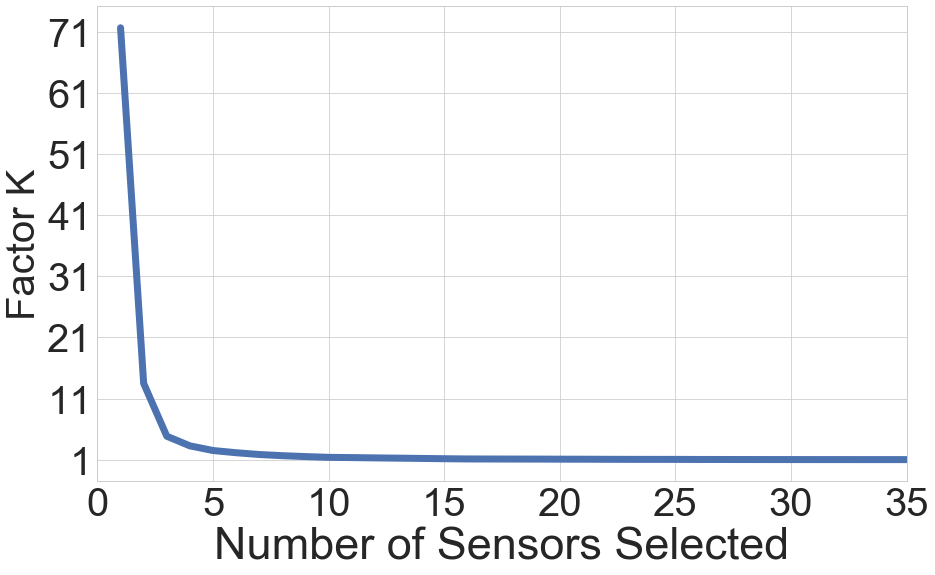

In [49]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_ot_approx_real = pd.read_csv('plot_data30/Offline_Greedy_30.csv', header=None)

X_approx, Y_approx = df_ot_approx_real[0].tolist(), df_ot_approx_real[1].tolist()
X_real, Y_real = df_ot_approx_real[0].tolist(), df_ot_approx_real[2].tolist()

X_factor_k = df_ot_approx_real[0].tolist()
Y_factor_k = (df_ot_approx_real[1]-1)/(df_ot_approx_real[2]-1).tolist()

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_factor_k, Y_factor_k)

plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Factor K', fontsize=40)
x_axis = np.arange(0, 40, 5)
plt.xticks(x_axis)
y_axis = np.arange(1, 80, 10)
plt.yticks(y_axis)
plt.xlim([0, 35])
#plt.ylim([0, 1])

plt.savefig('plot/factor-k.pdf')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


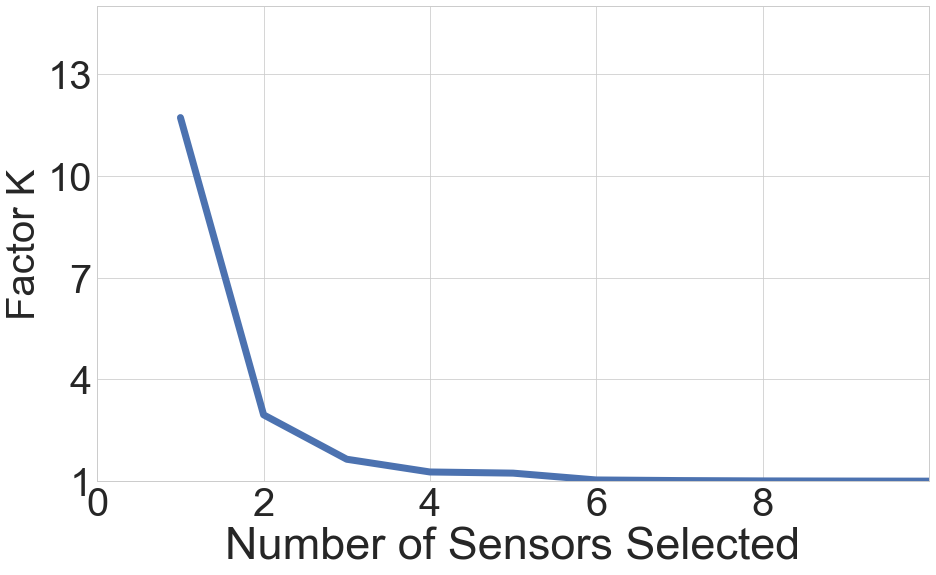

In [98]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df_ot_approx_real = pd.read_csv('plot_data20/Offline_Greedy.csv', header=None)

X_approx, Y_approx = df_ot_approx_real[0].tolist(), df_ot_approx_real[1].tolist()
X_real, Y_real = df_ot_approx_real[0].tolist(), df_ot_approx_real[2].tolist()

X_factor_k = df_ot_approx_real[0].tolist()
Y_factor_k = (df_ot_approx_real[1]-1)/(df_ot_approx_real[2]-1).tolist()

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X_factor_k, Y_factor_k)

plt.xlabel('Number of Sensors Selected', fontsize=45)
plt.ylabel('Factor K', fontsize=40)
x_axis = np.arange(0, 10, 2)
plt.xticks(x_axis)
y_axis = np.arange(1, 15, 3)
plt.yticks(y_axis)

plt.xlim([0, 10])
plt.ylim([1, 15])

plt.savefig('plot20/factor-k.pdf')
plt.show()

# 8 Scalability Test -- Offline

## 8.1 Budget

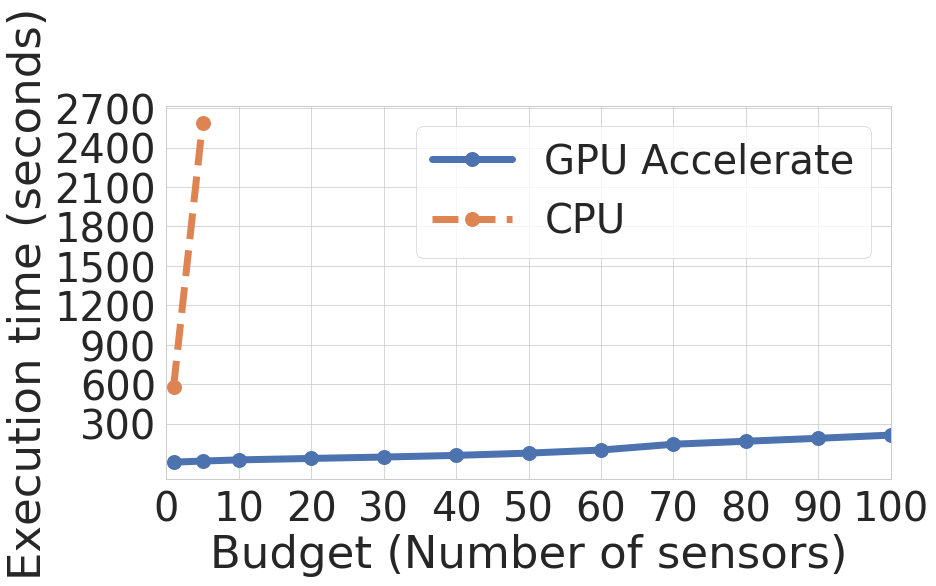

In [49]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/budget_off_GPU.csv', header=None)
df2 = pd.read_csv('plot_data64/scalability_test/budget_off_CPU.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()
X2, Y2 = df2[0].tolist(), df2[1].tolist()

#X.insert(0, 0)
#Y.insert(0, 0)
#X.insert(len(X), 90)
#Y.insert(len(Y), 2*Y[len(Y)-1] - Y[len(Y) - 2])
#X.insert(len(X), 100)
#Y.insert(len(Y), 2*Y[len(Y)-1] - Y[len(Y) - 2])

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)c
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)

plt.legend(['GPU Accelerate', 'CPU'], prop={'size':40})
plt.xlabel('Budget (Number of sensors)', fontsize=45)
plt.ylabel('Execution time (seconds)', fontsize=45)
x_axis = np.arange(0, 101, 10)
plt.xticks(x_axis)
plt.yticks(np.arange(300, 2800, 300))
plt.xlim([0, 100])

#plt.ylim([0, 220])

plt.savefig('plot64/scalability_test/budget_off.pdf')
plt.show()

## 8.2 Hypothesis

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


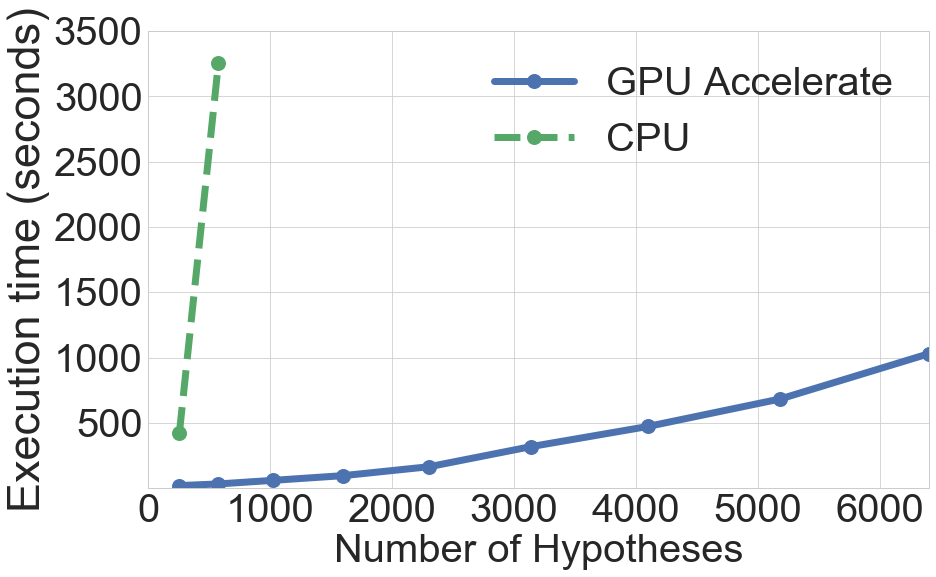

In [199]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/hypothesis_off_GPU.csv', header=None)
df2 = pd.read_csv('plot_data64/scalability_test/hypothesis_off_CPU.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()
X2, Y2 = df2[0].tolist(), df2[1].tolist()

#X.insert(0, 0)
#Y.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)
plt.legend(['GPU Accelerate', 'CPU'], prop={'size':40})
plt.xlabel('Number of Hypotheses', fontsize=40)
plt.ylabel('Execution time (seconds)', fontsize=45)
plt.xticks(np.arange(0, 7001, 1000))
plt.yticks(np.arange(500, 3501, 500))
plt.xlim([0, 6400])
plt.ylim([0, 3500])

plt.savefig('plot64/scalability_test/hypothesis_off.pdf')
plt.show()

## 8.3 Sensors

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


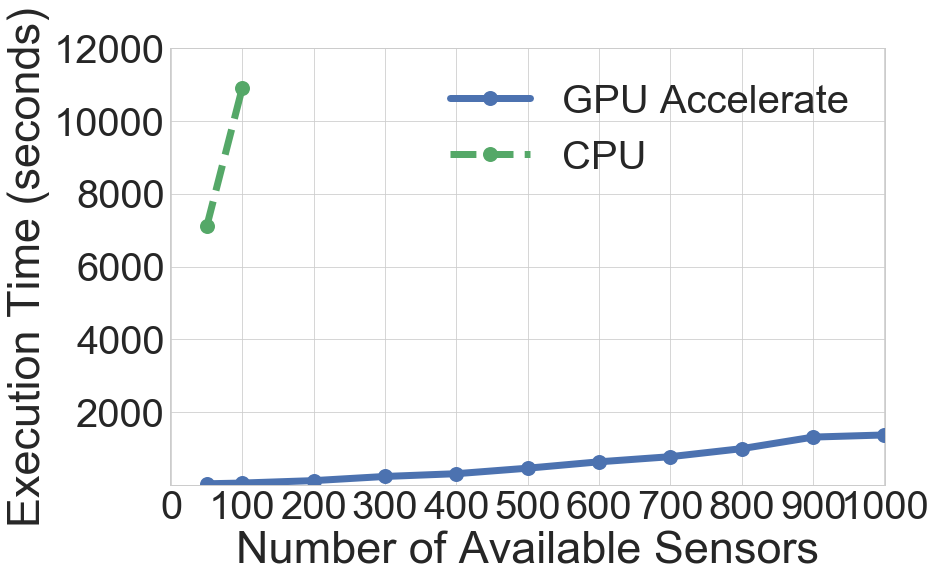

In [124]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/sensor_off_GPU.csv', header=None)
df2 = pd.read_csv('plot_data64/scalability_test/sensor_off_CPU.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()
X2, Y2 = df2[0].tolist(), df2[1].tolist()

#X.insert(0, 0)
#Y.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)
plt.plot(X2, Y2, linestyle='--', marker='o', markersize=15)
plt.legend(['GPU Accelerate', 'CPU'], prop={'size':40})
plt.xlabel('Number of Available Sensors', fontsize=45)
plt.ylabel('Execution Time (seconds)', fontsize=45)
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(2000, 14000, 2000))
plt.xlim([-1, 1001])
plt.ylim([0, 12000])
#plt.xticks(fontsize=35)

plt.savefig('plot64/sensor_off.pdf')
plt.show()


# 9 Scalability Test -- Online

## 9.1 Budget

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


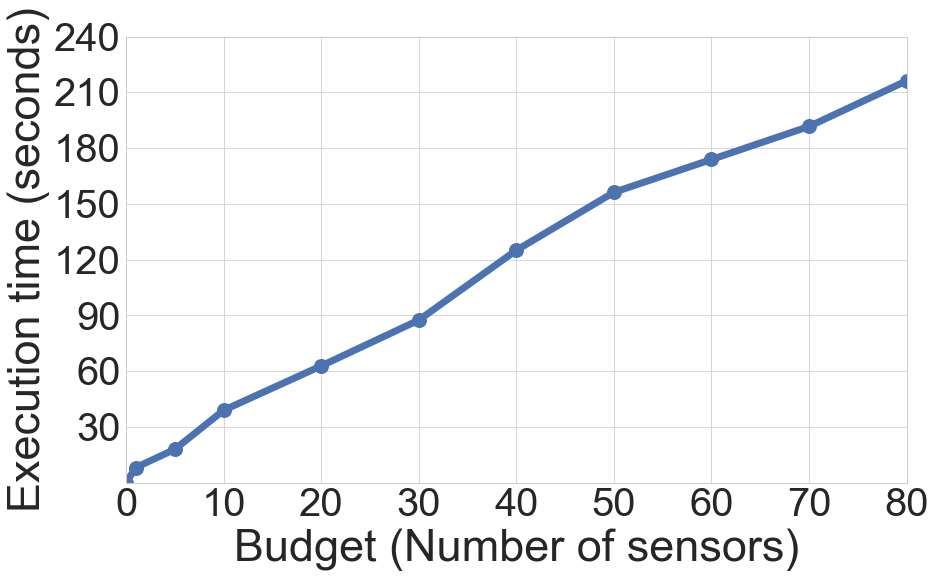

In [203]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/budget_on.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()
X.insert(0, 0)
Y.insert(0, 0)
rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)c
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)

#plt.legend(['GPU Accelerate', 'CPU'], prop={'size':40})
plt.xlabel('Budget (Number of sensors)', fontsize=45)
plt.ylabel('Execution time (seconds)', fontsize=45)
plt.xticks(np.arange(0, 81, 10))
plt.yticks(np.arange(30, 241, 30))
plt.xlim([0, 80])
plt.ylim([0, 240])

plt.savefig('plot64/scalability_test/budget_on.pdf')
plt.show()

## 9.2 Hypothesis

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


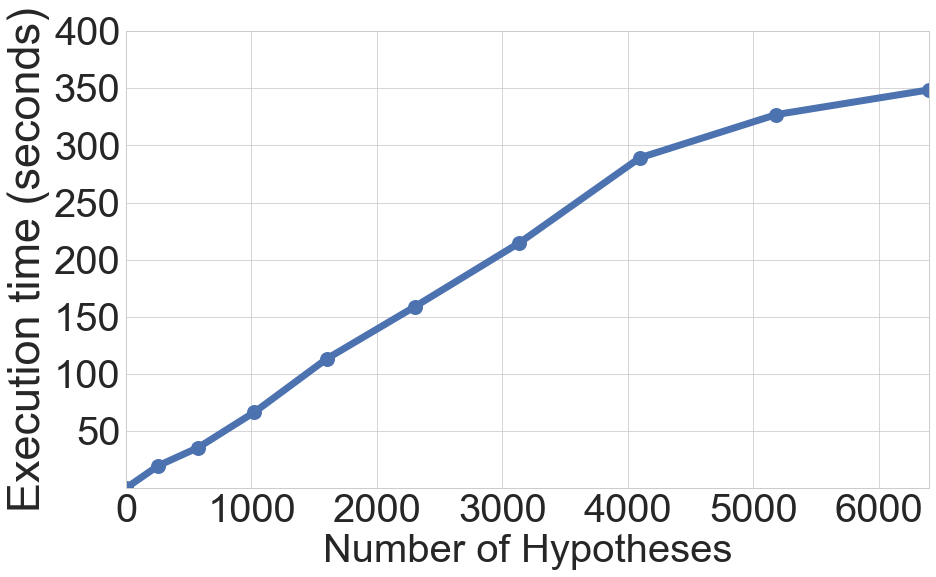

In [202]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/hypothesis_on.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()

X.insert(0, 0)
Y.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)
#plt.legend(['Greedy'], prop={'size':40})
plt.xlabel('Number of Hypotheses', fontsize=40)
plt.ylabel('Execution time (seconds)', fontsize=45)
plt.xticks(np.arange(0, 7001, 1000))
plt.yticks(np.arange(50, 401, 50))
plt.xlim([0, 6400])
plt.ylim([0, 400])

plt.savefig('plot64/scalability_test/hypothesis_on.pdf')
plt.show()

## 9.3 Sensors

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


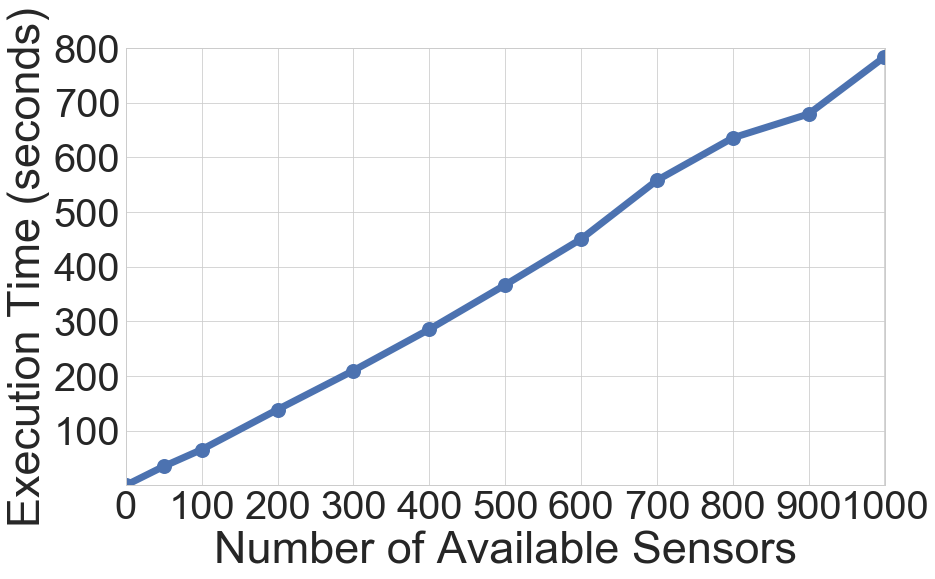

In [201]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
def_figsize = 56, 20
#rcParams['figure.figsize'] = 28, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")
SMALL_SIZE = 40
MEDIUM_SIZE = 40
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

df = pd.read_csv('plot_data64/scalability_test/sensor_on.csv', header=None)

X, Y = df[0].tolist(), df[1].tolist()

X.insert(0, 0)
Y.insert(0, 0)

rcParams['lines.linewidth'] = 7

plt.figure(figsize=(14,9))
#plt.setp(linewidth=4)
plt.plot(X, Y, linestyle='-', marker='o', markersize=15)
#plt.legend(['Greedy'], prop={'size':40})
plt.xlabel('Number of Available Sensors', fontsize=45)
plt.ylabel('Execution Time (seconds)', fontsize=45)
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(100, 801, 100))
plt.xlim([0, 1001])
plt.ylim([0, 800])

plt.savefig('plot64/scalability_test/sensor_on.pdf')
plt.show()

In [68]:
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
Splinexp = [1, 2, 3]
x = [1, 2, 3]
yp = [4, 5, 6]
rbf = Rbf(x, yp, function='linear')
rbf(6)

array(21.)

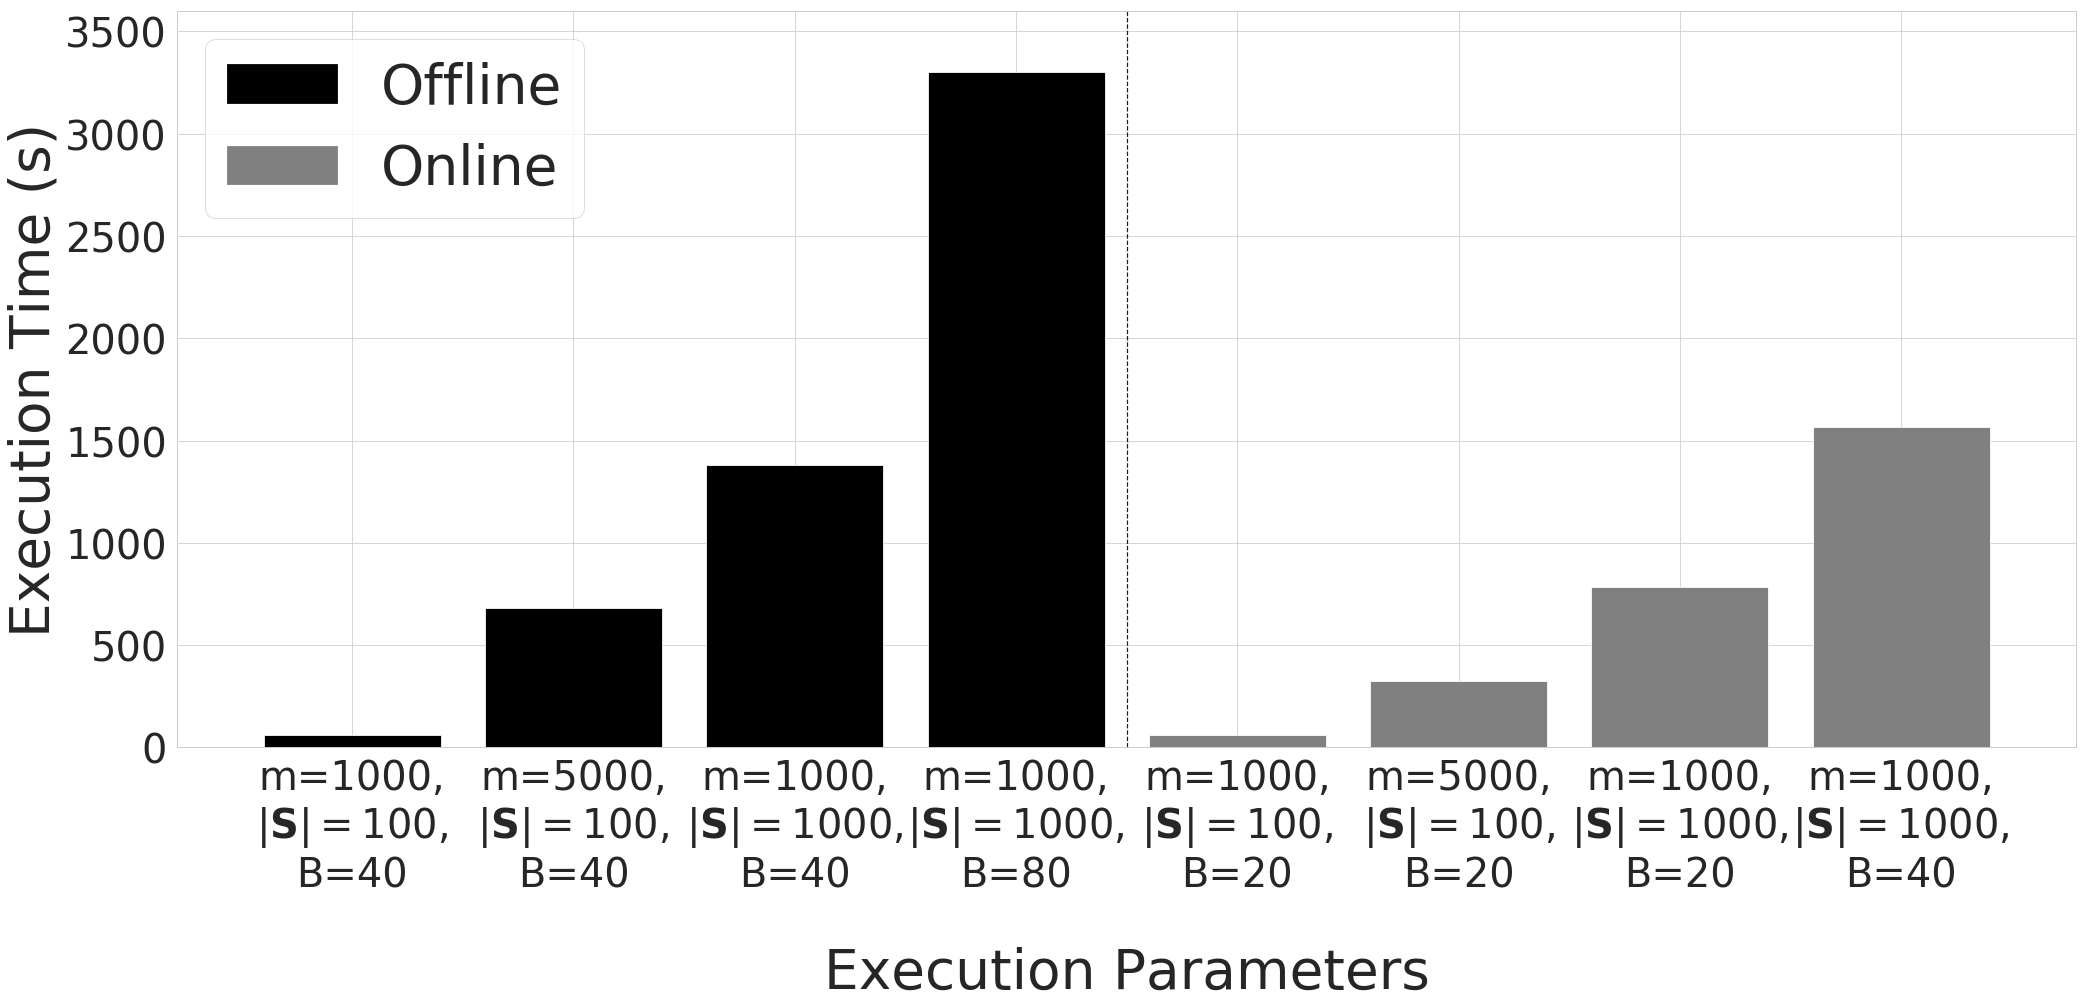

In [14]:
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True})
def_figsize = 85, 20

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

SMALL_SIZE = 40
MEDIUM_SIZE = 55
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title
hypotheses_labels = [1000, 5000, 1000, 1000, 1000, 5000, 1000, 1000]
sensors_labels = [100, 100, 1000, 1000, 100, 100, 1000, 1000]
budget_labels = [40, 40, 40, 80, 20, 20, 20, 40]
colors = ['black', 'black', 'black', 'black', 'grey', 'grey', 'grey', 'grey']

plt.figure(figsize=(30,15))
plt.xticks(rotation=0)
plt.axvline(x=3.5, color='k', linestyle='--')

labels = ['m=' + str(hypotheses_labels[i]) + ',\n$|\mathbf{S}|=' + str(sensors_labels[i]) + '$,\nB=' + str(budget_labels[i]) for i in range(len(budget_labels))]
labels[4] = labels[4] + '\n'
labels[5] = labels[5] + '\n'
labels[6] = labels[6] + '\n'
labels[7] = labels[7] + '\n'
execution_time_gpu = [59, 683, 1379, 3300, 63, 327, 783, 1566]
plt.xlabel('Execution Parameters')
plt.ylabel('Execution Time (s)')
plt.ylim([0, 3600])
plt.bar(labels, execution_time_gpu, color=colors)

offline_color = mpatches.Patch(color='black', label='Offline')
online_color = mpatches.Patch(color='grey', label='Online')
plt.legend(handles=[offline_color, online_color], loc=2)
plt.savefig('plot64/scalability_test/offline_scalability.pdf')
plt.show()

NameError: name 'NA' is not defined

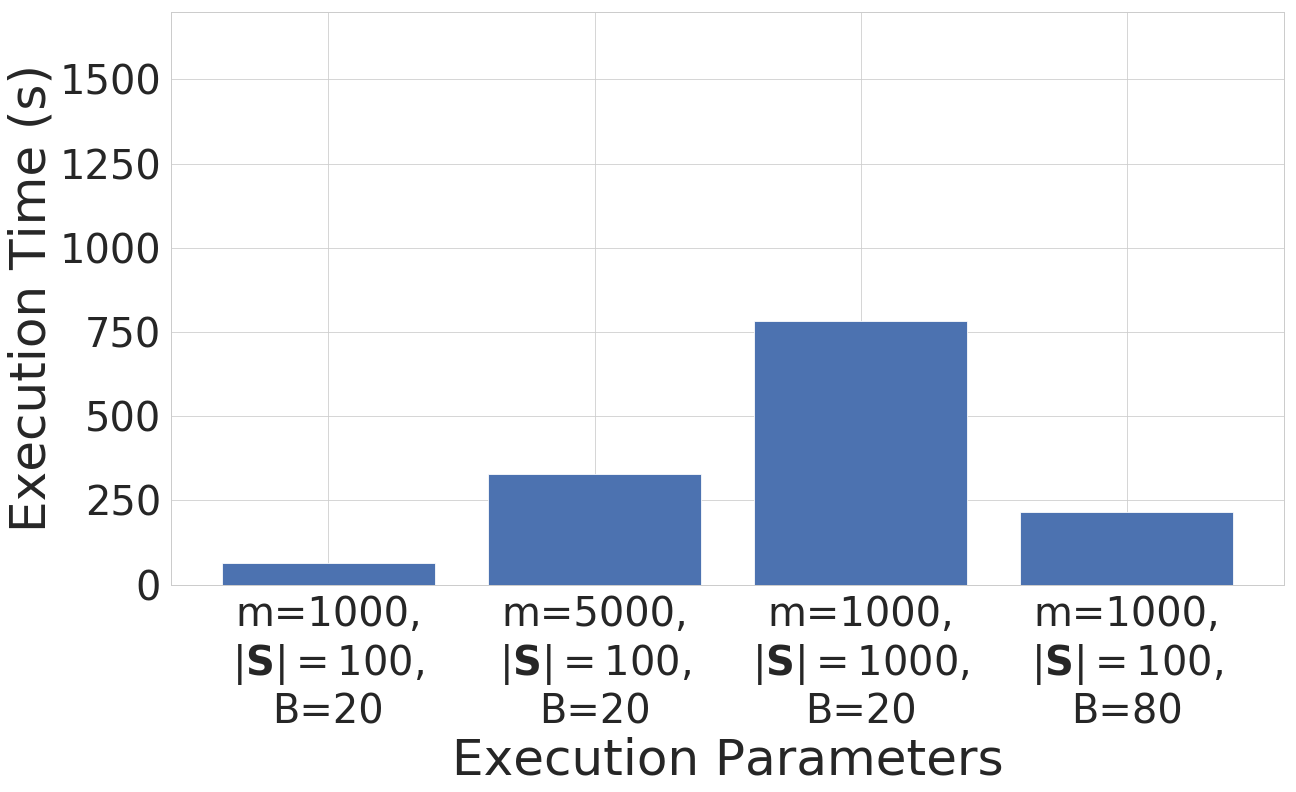

In [5]:
from matplotlib import rcParams

def_figsize = 85, 20

rcParams.update({'figure.autolayout': True})

plt.style.use('seaborn-paper')
sns.set(context='paper', font_scale=1.6)
sns.set_style("whitegrid")

SMALL_SIZE = 40
MEDIUM_SIZE = 50
BIGGER_SIZE = 40
#
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) # fontsize of the figure title

hypotheses_labels = [1000, 5000, 1000, 1000]
sensors_labels = [100, 100, 1000, 100]
budget_labels = [20, 20, 20, 80]

plt.figure(figsize=(19,12))
import matplotlib.patches as mpatches

labels = ['m=' + str(hypotheses_labels[i]) + ',\n$|\mathbf{S}|=' + str(sensors_labels[i]) + '$,\nB=' + str(budget_labels[i]) for i in range(len(budget_labels))]
execution_time_cpu = [63, 327, 783, 216]
plt.xlabel('Execution Parameters')
plt.ylabel('Execution Time (s)')
plt.ylim([0, 1700])
plt.bar(labels, execution_time_cpu)
plt.legend(handles=[], loc=2)
plt.savefig('plot64/scalability_test/online_scalability.pdf')
plt.show()
plt.close()